# An Abbreviated Introduction to Quantum Computing

For over twenty years inspiring and fascinating work has brought together one of our most fundamental theories of physics - quantum mechanics - and one of our most powerful technologies - computing. Quantum computing is a beautifully interdiscipliary area with two categories of major impact:

1. It reorients the relationship between physics and computer science: physics does not just place restrictions on what computers we can design, it also grants new power and inspiration.

2. It promises technology that simulates nature at its most fundamental level, allowing us to access deep problems in quantum chemistry, materials discovery, and more.

To get here, we've needed to change our usual intuition in many ways.  This sort of intuition reset will be familiar to many programmers from the first time that they learned object-oriented programming, functional programming, distributed programming, or any one of the other marvelous ways of thinking that have been expressed in code over the years.  Like these other paradigms, quantum computing opens up new potential when the basic concepts are grasped.  Unlike these other examples, quantum computing goes further, requiring something akin to an extension of probability theory.  This extension, and the core of quantum computing, are about linear algebra, so this is where we begin: with linear algebra and probability.

## From bit to qubit

#### Probabilistic bits as vector spaces
From an operational perspective, a bit is described by the results of measurements of that bit.  Let the possible results of measuring a bit (0 or 1) be represented by orthonormal basis vectors \\(\\vec{0}\\) and \\(\\vec{1}\\). We'll call these vectors **outcomes**. These outcomes span a two-dimensional vector space that represents a probabilistic bit. A probabilistic bit can be represented as a vector $$ \vec{v} = a\,\vec{0} + b\,\vec{1},$$ where \\(a\\) represents the probability of the bit being 0 and \\(b\\) represents the probability of the bit being 1.  This clearly also requires that \\(a+b=1\\).  In this picture the **system** (the probabilistic bit) is a two-dimensional real vector space and a **state** of a system is a particular vector in that vector space.

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


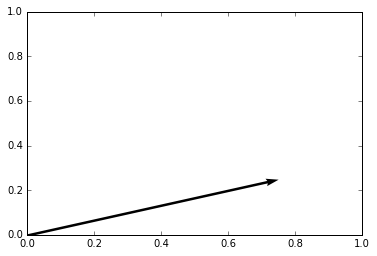

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
outcome_0 = np.array([1.0, 0.0])
outcome_1 = np.array([0.0, 1.0])
a = 0.75
b = 0.25

prob_bit = a*outcome_0 + b*outcome_1

X,Y = prob_bit
plt.figure()
ax = plt.gca()
ax.quiver(X,Y,angles='xy',scale_units='xy',scale=1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.draw()
plt.show()

Given some state vector, like the one plotted above, we can find the probabilities associated to each outcome by projecting the vector onto the basis outcomes. This gives us a rule like the following:
$$ Pr(0) = \vec{v}^T\,\cdot\,\vec{0} = a \\ Pr(1) = \vec{v}^T\,\cdot\,\vec{1} = b,$$
where Pr(0) and Pr(1) are the probabilities of the 0 and 1 outcomes respectively.

#### A remark on notation: Dirac Notation

Physicists have introduced a nice notation for these transposes and dot products (Dirac notation) which rewrites
$$ \vec{v} = |\,v\rangle \\ \vec{v}^T = \langle v\,| \\ \vec{u}^T\cdot\vec{v} = \langle u\,|\,v \rangle.$$
So we can rewrite out "measurement rule" in this notation as
$$ Pr(0) = \langle v\,|\,0 \rangle = a \\ Pr(1) = \langle v\,|\,1 \rangle = b.$$ 
We will use this notation throughout the rest of this introduction.

#### Multiple probabilistic bits

This vector space interpretation of a single probabilistic bit can be straightforwardly extended to multiple bits.  Let's take two coins as an example (but labelled 0 and 1 instead of H and T since we are programmers). Their states can be represented as
$$ |\,u\rangle = \frac{1}{2}|\,0_u\rangle + \frac{1}{2}|\,1_u\rangle \\
|\,v\rangle = \frac{1}{2}|\,0_v\rangle + \frac{1}{2}|\,1_v\rangle, $$
where \\(1_u\\) represents the 1 outcome on coin \\(u\\).  The **combined system** of the two coins has four possible outcomes \\(\\{ 0_u0_v,\\;0_u1_v,\\;1_u0_v,\\;1_u1_v \\}\\) that are the basis states of a larger four-dimensional vector space.  The rule for constructing the **combined state** is to take the tensor product of the individual states, e.g.
$$ |\,u\rangle\otimes|\,v\rangle = \frac{1}{4}|\,0_u0_v\rangle+\frac{1}{4}|\,0_u1_v\rangle+\frac{1}{4}|\,1_u0_v\rangle+\frac{1}{4}|\,1_u1_v\rangle. $$
The combined space is then also given by the tensor product of the vector spaces spanned by  \\(\\{|\\,0_u\\rangle, |\\,1_u\\rangle\\}\\) and  \\(\\{|\\,0_v\\rangle, |\\,1_v\\rangle\\}\\) respectively.

We'll talk more about these larger spaces in the quantum case, but it is important to note that not all composite states can be written as tensor products of sub-states.  In general, the combined state for \\(n\\) probabilistic bits is a vector of size \\(2^n\\) and is given by \\(\\bigotimes_0^{n-1}|\\,v_i\\rangle\\).

#### Qubits

Quantum mechanics rewrites these rules some.  A quantum bit, called a qubit, is the quantum analog of a bit in that it has two outcomes when it is measured.  Similar to the previous section, a qubit can also be represented in a vector space, but with complex coefficients instead of real ones.  A qubit **system** is a two-dimensional complex vector space, and the **state** of a qubit is a complex vector in that space. Again we will define a basis of outcomes \\(\\{|\\,0\\rangle, |\\,1\\rangle\\}\\) and let a generic qubit state be written as
$$\alpha |\,0\rangle + \beta |\,1\rangle.$$
Since these coefficients can be imaginary, they cannot be immediately be interpreted as probabilities of their associated outcomes.  Instead we rewrite the rule for outcomes in the following manner:
$$ Pr(0) = |\langle v\,|\,0 \rangle|^2 = |a|^2 \\ Pr(1) = |\langle v\,|\,1 \rangle|^2 = |b|^2,$$
and as long as \\(|a|^2+|b|^2 = 1\\) we are able to recover acceptable probabilities for outcomes based on our new complex vector. 

This switch to complex vectors means that rather than representing a state vector in the plane, we instead to representing the vector on a sphere (called the Bloch sphere in the quantum mechanics literature). From this perspective the quantum state corresponding to a certain 0 outcome is represented by:

## ---------IMAGE HERE----------

Multiple qubits are represented in precisely the same way, but taking tensor products of the spaces and states. Thus \\(n\\) qubits have \\(2^n\\) possible states.

#### An important distinction

An important distinction between the probabilistic case described above and the quantum case is that probabilistic states may just mask out ignorance.  For example a coin is physically only 0 or 1 and the probalistic view merely represents our ignorance about which it actually is.  **This is not the case in quantum mechanics**.  The quantum states - as far as we know - cannot mask any underlying state. This is what people mean when they say that there is no "hidden variable theory" for quantum mechanics.  These probabilistic quantum states are as real as it gets: they don't describe our knowledge of the quantum system, they describe the physical reality of the system.

#### Some code
Let's take a look at some code in pyQuil to see how these quantum states play out.  We'll explain many more details about operations and pyQuil in the next sections.

In [2]:
# imports for pyQuil (ignore for now)
from pyquil.quil import Program
import pyquil.forest as qvm
quantum_simulator = qvm.Connection()
import numpy as np

# pyQuil is based around operations (or gates) so we'll start with the most
# basic one: the identity operation, called I. I takes one argument, the index
# of the qubit that it should be applied to.
from pyquil.gates import I

# make a quantum program that allocates one qubit (qubit #0) and does nothing to it
p = Program(I(0))

# quantum states are called wavefunctions for historical reasons
# so we can run this basic program on our connection to the simulator.
# This call will return the state of our qubits after we run program p.
alpha, beta = quantum_simulator.wavefunction(p)
print "Our qubit is in the state alpha={} and beta={}".format(alpha, beta)
print "The probability of measuring the qubit in outcome 0 is {}".format(np.conj(alpha)*alpha)
print "The probability of measuring the qubit in outcome 1 is {}".format(np.conj(beta)*beta)

Our qubit is in the state alpha=(1+0j) and beta=0j
The probability of measuring the qubit in outcome 0 is (1+0j)
The probability of measuring the qubit in outcome 1 is 0j


In [3]:
# we can import the qubit "flip" operation (called X), which we'll talk about in the next section
# and see what that does.
from pyquil.gates import X
p = Program(X(0))

alpha, beta = quantum_simulator.wavefunction(p)
print "Our qubit is in the state alpha={} and beta={}".format(alpha, beta)
print "The probability of measuring the qubit in outcome 0 is {}".format(np.conj(alpha)*alpha)
print "The probability of measuring the qubit in outcome 1 is {}".format(np.conj(beta)*beta)

Our qubit is in the state alpha=0j and beta=(1+0j)
The probability of measuring the qubit in outcome 0 is 0j
The probability of measuring the qubit in outcome 1 is (1+0j)


In [4]:
# multiple qubits also produce the expected scaling of the state
p = Program(I(0), I(1))
print "The quantum state is of dimension:", len(quantum_simulator.wavefunction(p))

p = Program(I(0), I(1), I(2), I(3))
print "The quantum state is of dimension:", len(quantum_simulator.wavefunction(p))

p = Program()
for x in range(10):
    p.inst(I(x))
print "The quantum state is of dimension:", len(quantum_simulator.wavefunction(p))

The quantum state is of dimension: 4
The quantum state is of dimension: 16
The quantum state is of dimension: 1024


In [5]:
# wavefunction(Program) returns a coefficient array that corresponds to outcomes in the following order
print quantum_simulator.probabilities(Program(I(0), I(1)))

{'11': 0.0, '10': 0.0, '00': 1.0, '01': 0.0}


## Qubit operations

In the previous section we introduced our first two "operations" the I (or identity operation) and the X operation. Here we'll get into some more details on what these operations are.  Quantum states are complex vectors and quantum operations are **unitary matrices**.  Applying an operation to a quantum state is the same as multiplying a vector by a certain kind of matrix. These matrices are called **gates**

Since individual qubits are two-dimensional vectors, operations on individual qubits are 2x2 matrices.  This is what the identity matrix looks like:
$$
I = \left(\begin{matrix}
1 & 0\\
0 & 1
\end{matrix}\right)
$$
so the a program that applies this operation to the zero state is just
$$ I\,|\,0\rangle = \left(\begin{matrix}
1 & 0\\
0 & 1
\end{matrix}\right)\left(\begin{matrix}
1 \\
0 
\end{matrix}\right) = \left(\begin{matrix}
1 \\
0 
\end{matrix}\right) = |\,0\rangle$$

In [6]:
p = Program(I(0))
quantum_simulator.wavefunction(p)

array([ 1.+0.j,  0.+0.j])

Other standard gates on single qubits are given by the Pauli operator matrices
$$
X = \left(\begin{matrix}
0 & 1\\
1 & 0
\end{matrix}\right)
\qquad
Y = \left(\begin{matrix}
0 & -i\\
i & 0
\end{matrix}\right)
\qquad
Z = \left(\begin{matrix}
1 & 0\\
0 & -1
\end{matrix}\right)
$$

In [7]:
from pyquil.gates import X, Y, Z
p = Program(X(0))
print "X|0> = ", quantum_simulator.wavefunction(p) 
print "With outcome probabilities\n", quantum_simulator.probabilities(p), "This looks like a bit flip.\n"
p = Program(Y(0))
print "Y|0> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)
p = Program(Z(0))
print "Z|0> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)

X|0> =  [ 0.+0.j  1.+0.j]
With outcome probabilities
{'1': 1.0, '0': 0.0} This looks like a bit flip.

Y|0> =  [ 0.+0.j  0.+1.j]
With outcome probabilities
{'1': 1.0, '0': 0.0}
Z|0> =  [ 1.+0.j  0.+0.j]
With outcome probabilities
{'1': 0.0, '0': 1.0}


In [8]:
# composing qubit operations is the same as multiplying multiple matrices in sequence
p = Program(X(0), Y(0), Z(0))
print "ZYX|0> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)

ZYX|0> =  [ 0.-1.j  0.+0.j]
With outcome probabilities
{'1': 0.0, '0': 1.0}


Operations can also be applied to composite states of multiple qubits. One common example is the controlled-not or CNOT gate that works on two qubits.  Its matrix form is:
$$
CNOT = \left(\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{matrix}\right)
$$

In [9]:
from pyquil.gates import CNOT

p = Program(CNOT(0, 1))
print "CNOT|00> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)
p = Program(X(0), CNOT(0, 1))
print "CNOT|01> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)
p = Program(X(1), CNOT(0, 1))
print "CNOT|10> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)
p = Program(X(0), X(1), CNOT(0, 1))
print "CNOT|11> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)

CNOT|00> =  [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
With outcome probabilities
{'11': 0.0, '10': 0.0, '00': 1.0, '01': 0.0}
CNOT|01> =  [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
With outcome probabilities
{'11': 1.0, '10': 0.0, '00': 0.0, '01': 0.0}
CNOT|10> =  [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
With outcome probabilities
{'11': 0.0, '10': 1.0, '00': 0.0, '01': 0.0}
CNOT|11> =  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
With outcome probabilities
{'11': 0.0, '10': 0.0, '00': 0.0, '01': 1.0}


Another example is the SWAP gate:
$$
SWAP = \left(\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{matrix}\right)
$$

In [10]:
from pyquil.gates import SWAP

print "SWAP|01> = ", quantum_simulator.wavefunction(p)
print "With outcome probabilities\n", quantum_simulator.probabilities(p)

SWAP|01> =  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
With outcome probabilities
{'11': 0.0, '10': 0.0, '00': 0.0, '01': 1.0}


Quantum computing operations are then composed of a series of these complex matrices being applied to complex vectors.  The reason that these matrices have to be unitary (i.e. that their complex conjugate transpose is their inverse) is that this preserves that the overall probability of all outcomes always sums to one.

## The Quantum Abstract Machine

We now have enough background to introduce the overall programming model that underlies Quil.  This is a hybrid quantum-classical model where some \\(N\\) qubits interact with \\(M\\) classical bits. It looks a little like this:

## IMAGE HERE

These qubits and classical bits come with a defined gate set, e.g. which gate operations can be applied to which qubit.  Different kinds of quantum computing hardware places different limitations on what gates can be applied, and the fixed gate set represents these limitations.

The next section on measurements will describe the interaction between the classical and quantum parts of a Quantum Abstract Machine (QAM).

## Qubit measurements: classical/quantum interaction

Measurements have two effects:
1. They project the state vector onto one of the basic outcomes 
2. (and this is optional) They store the outcome of the measurement in a classical bit.

Here's a simple example:

In [14]:
# create a program that stores the outcome of measuring qubit #0 into classical register [0]
classical_register_index = 0
p = Program(I(0)).measure(0, classical_register_index)

So far we have used the quantum simulator to cheat a little bit.  We have actually looked at the wavefunction that comes back, when, on real quantum hardware, we are unable to directly look at the wavefunction. Instead we only have access to the classical bits that are affected by measurements.  This functionality is emulated by the `qvm_run` command.

In [16]:
# choose what classical registers to look in at the end of the computation
classical_regs = [0, 1]
quantum_simulator.run(p, classical_regs)

[[0, 0]]

We see that both registers are zero. However, if we had flipped the qubit before measurement then we obtain:

In [18]:
classical_register_index = 0
p = Program(X(0)) # flip the qubit
p.measure(0, classical_register_index) # measure the qubit

classical_regs = [0, 1]
quantum_simulator.run(p, classical_regs)

[[1, 0]]

These measurements are deterministic, e.g. if we make them multiple times the we always get the same outcome:

In [19]:
classical_register_index = 0
p = Program(X(0)) # flip the qubit
p.measure(0, classical_register_index) # measure the qubit

classical_regs = [0]
trials = 10
quantum_simulator.run(p, classical_regs, trials)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

However this is not the case in general.  Looking at those examples will allow us to understand the way that measurements affect the quantum state as well. We will see that measurements act like projections onto the outcome basis states.  First we introduce the Hadamard matrix:
$$
H = \frac{1}{\sqrt{2}}\left(\begin{matrix}
1 & 1\\
1 & -1
\end{matrix}\right)
$$

In [21]:
from pyquil.gates import H

# The Hadamard produces what is called a superposition state
coin_program = Program(H(0))
print "H|0> = ", quantum_simulator.wavefunction(coin_program)
print "With outcome probabilities\n", quantum_simulator.probabilities(coin_program)

H|0> =  [ 0.70710678+0.j  0.70710678+0.j]
With outcome probabilities
{'1': 0.49999999999999989, '0': 0.49999999999999989}


A qubit in this state will half the time be measured to be in 0 and half the time be measured to be in 1. In essence this qubit truly is a random variable representing a coin.  In fact, there are many wavefunctions that will give this same operational outcome. There is a continuous family of states of the form:
$$
\frac{1}{\sqrt{2}}\left(|\,0\rangle + e^{i\theta}|\,1\rangle\right)
$$
that represent the outcomes of an unbiased coin.

In [26]:
# introduce measurement
classical_reg = 0
coin_program = Program(H(0)).measure(0, classical_reg)
trials = 10

# we see probabilistic results of about half 1's and half 0's
quantum_simulator.run(coin_program, [0], trials)

[[0], [1], [1], [0], [1], [0], [0], [1], [0], [0]]

Another interesting thing to do is to look at the wavefunction AFTER a measurement.

In [31]:
classical_reg = 0
coin_program = Program(H(0))
print "Before measurement: H|0> = ", quantum_simulator.wavefunction(coin_program)
coin_program.measure(0, classical_reg)
for x in range(5):
    print "After measurement: ", quantum_simulator.wavefunction(coin_program)

Before measurement: H|0> =  [ 0.70710678+0.j  0.70710678+0.j]
After measurement:  [ 0.+0.j  1.+0.j]
After measurement:  [ 1.+0.j  0.+0.j]
After measurement:  [ 1.+0.j  0.+0.j]
After measurement:  [ 0.+0.j  1.+0.j]
After measurement:  [ 0.+0.j  1.+0.j]


We can clearly see that measurement has an effect on the quantum state independent of what is stored classically.  We begin in a state that has a 50-50 probability of being one or zero. After measurement, the state changes into being 100% 0 or 100% 1 depending on which outcome was obtained.  This is the phenomemon reffered to as wavefunction "collapse".  Mathematically, the wavefunction is being projected onto the vector of the obtained outcome.

In [34]:
# This happens with bigger systems too
classical_reg = 0

# this program prepares something called a Bell state (a special kind of "entangled state")
bell_program = Program(H(0), CNOT(0, 1))
print "Before measurement: Bell state = ", quantum_simulator.wavefunction(bell_program)
bell_program.measure(0, classical_reg)
for x in range(5):
    print "After measurement: ", quantum_simulator.probabilities(bell_program)

Before measurement: Bell state =  [ 0.70710678+0.j  0.00000000+0.j  0.00000000+0.j  0.70710678+0.j]
After measurement:  {'11': 1.0, '10': 0.0, '00': 0.0, '01': 0.0}
After measurement:  {'11': 0.0, '10': 0.0, '00': 1.0, '01': 0.0}
After measurement:  {'11': 0.0, '10': 0.0, '00': 1.0, '01': 0.0}
After measurement:  {'11': 1.0, '10': 0.0, '00': 0.0, '01': 0.0}
After measurement:  {'11': 1.0, '10': 0.0, '00': 0.0, '01': 0.0}


The above program prepares "entanglement" because even though their are random outcomes, after all measurement both qubits are the same. They are either both 0 or both 1. This kind of special correllation is the sort of thing quantum mechanics is famous for.

## ____ NICE DIAGRAMRAMRAR_______

## Classical control

There are also ways of introducing classical control of quantum programs, i.e. using the state of classical bits to determine what quantum operations to run.

In [36]:
if_prog = Program(X(7)) # if branch
else_prog = Program(I(7)) # else branch
p = Program(X(0)).measure(0, 1).quil_if(1, if_prog, else_prog) # branch on classical reg [1]
p.measure(7, 7) # measure qubit #7 into classical register [7]
quantum_simulator.run(p, [7]) # run and check register [7]

[[1]]

A [1] here means that qubit 7 was indeed flipped. ##DIAGRAMS

## Example: The Probabilistically Halting Problem

A fun example is to create a program that has an exponentially decreasing chance of halting, but that may run forever!

In [37]:
inside_loop = Program(H(0)).measure(0, 1)

p = Program().quil_while(1, inside_loop)
quantum_simulator.run(p, [1]) # run and check register [1]

[[1]]

##IAMGDS

# Next Steps

We hope that you have enjoyed your whirlwind tour of quantum computing. Lots more resources can be found online and we recommend Nielsen and Chuang's Quantum Information and Quantum Computation as a particular excellent begginers's resource.
